# analysis_d22a

### Purpose
Using Monte Carlo Drift Correction (MCDC), analyse data produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb), including production of figures and tables.

### Input data
NetCDF files in [data/](https://github.com/grandey/d22a-mcdc/tree/main/data/) (produced by [data_d22a.ipynb](https://github.com/grandey/d22a-mcdc/blob/main/data_d22a.ipynb)), each containing a global mean time series for a given variable, ESM variant, and CMIP6 scenario.

### Output files written
Figures (in [figs_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/figs_d22a)) and tables (in [tables_d22a/](https://github.com/grandey/d22a-mcdc/tree/main/tables_d22a)).

### Author
BSG, 2023.

In [1]:
import d22a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

matplotlib : 3.7.2
numpy      : 1.25.1
pandas     : 2.0.3
scipy      : 1.11.1
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [4]:
# Print constants relating to reference period, default ESM, and number of samples
for const in [d22a.REF_YRS, d22a.REF_STR, d22a.DEF_ESM, d22a.SAMPLE_N]:
    print(const)

[1850, 1859]
1850s
UKESM1-0-LL_r1i1p1f2
1500


In [5]:
# Read all model data into cache at start
_ = d22a.get_cmip6_df()

get_cmip6_df(ACCESS-CM2_r1i1p1f1, piControl): shifted start year from 950 to 1850
get_cmip6_df(ACCESS-ESM1-5_r1i1p1f1, piControl): shifted start year from 101 to 1790
get_cmip6_df(CanESM5_r1i1p1f1, piControl): shifted start year from 5201 to 1850
get_cmip6_df(EC-Earth3-Veg-LR_r1i1p1f1, piControl): shifted start year from 2300 to 1850
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): shifted start year from 1850 to 1790
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): gap after 2789; using period before gap; length 1800 yr -> 1000 yr
get_cmip6_df(MIROC6_r1i1p1f1, piControl): shifted start year from 3200 to 1850
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, piControl): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, historical): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1 ssp126): shifted yr-2015 zostoga from 2.0 to 69.4 mm
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, ssp126): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f

## Main manuscript

Written fig01.pdf (0.06 MB)
Written fig01.png (1.11 MB)


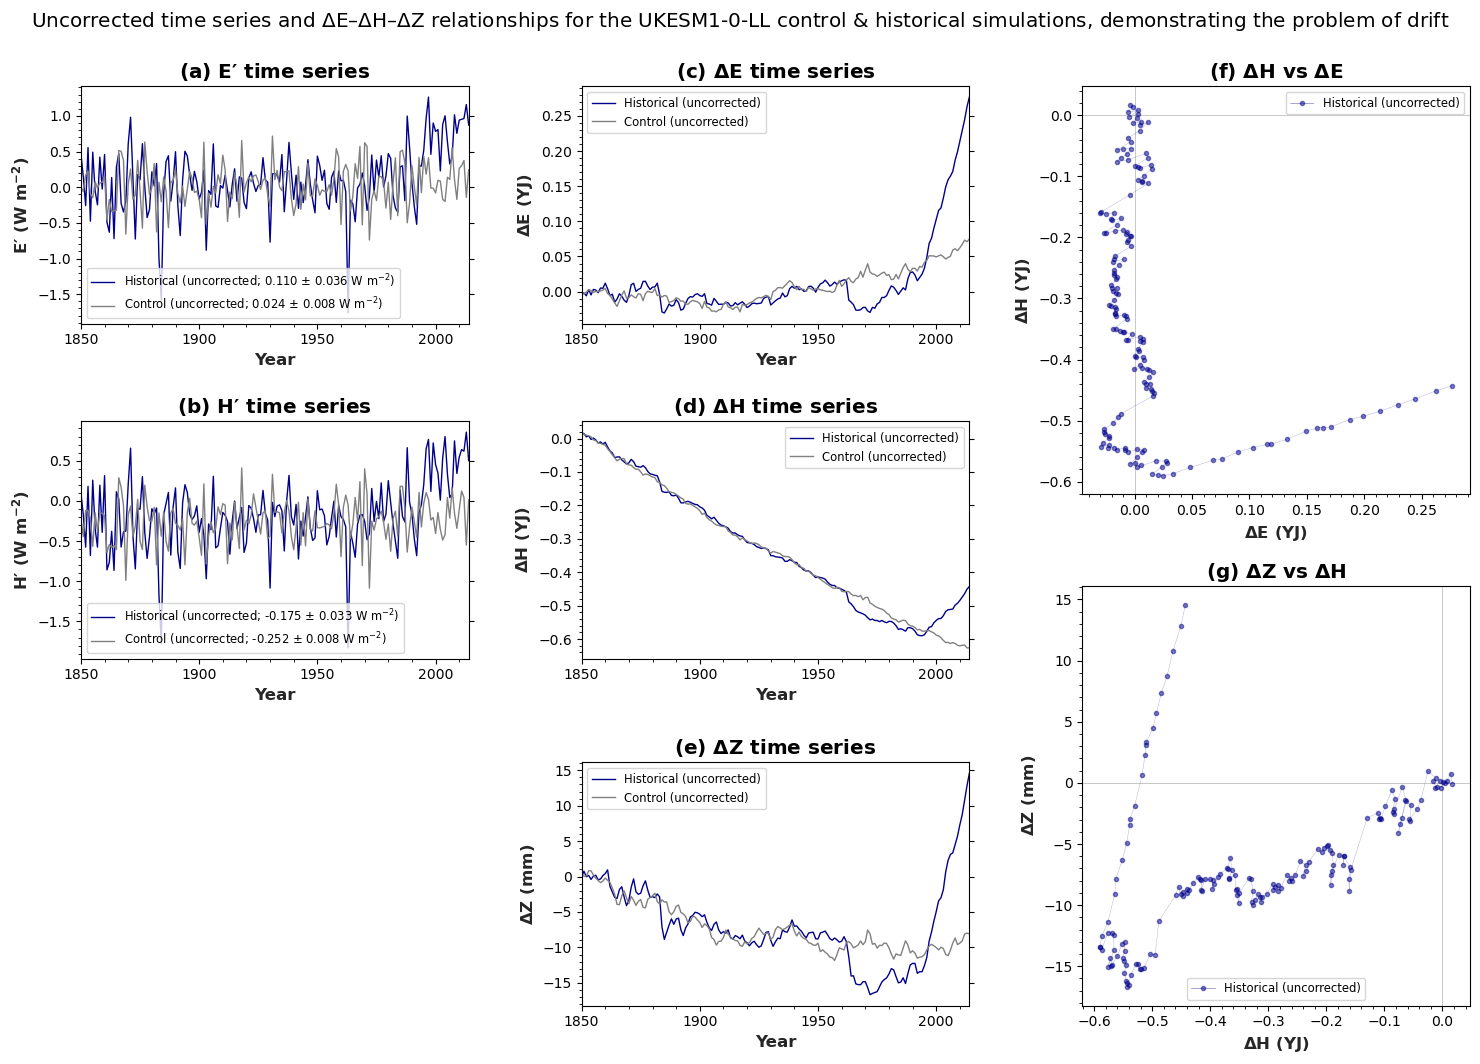

In [6]:
# Demonstrate problem of drift
fig = d22a.composite_problem_of_drift()
_ = d22a.name_save_fig(fig, fso='f')

Written fig02.pdf (36.83 MB)
Written fig02.png (2.57 MB)


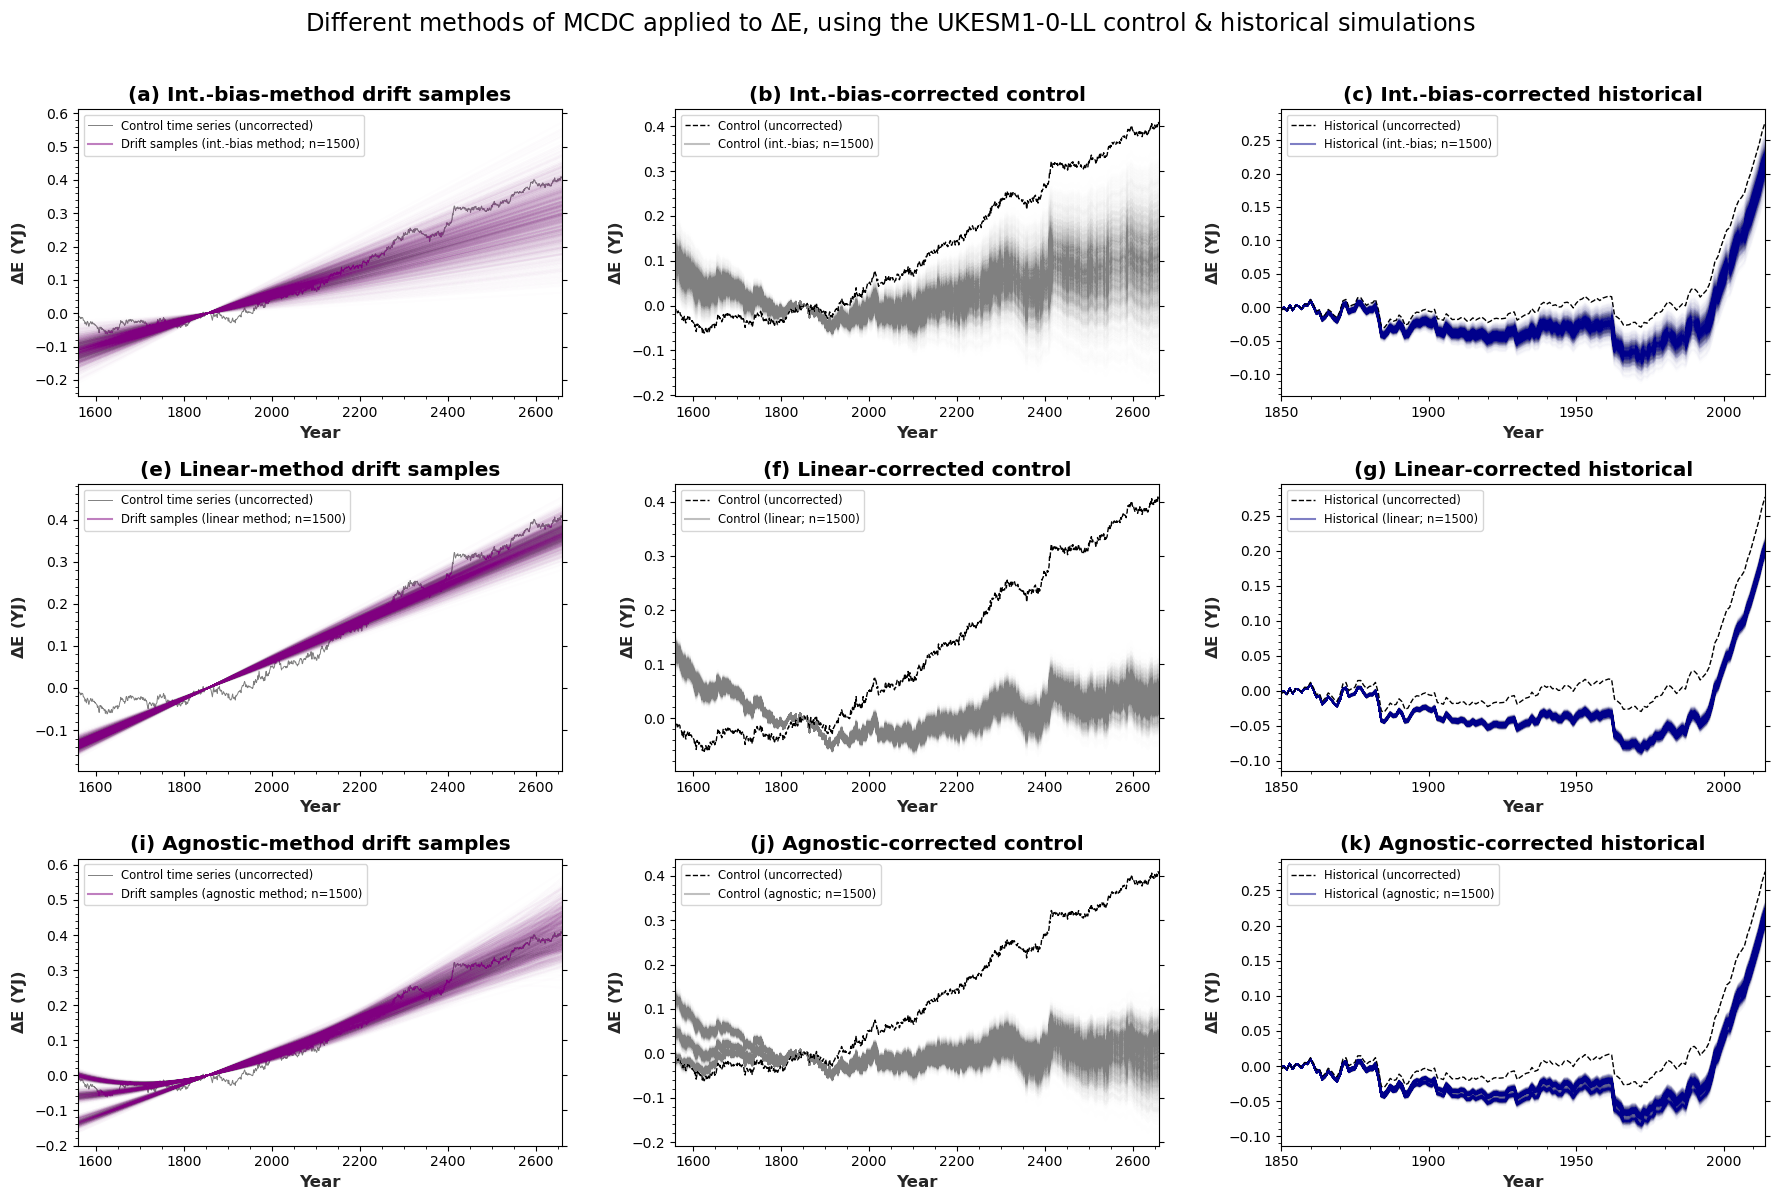

In [7]:
# Compare methods applied to E
fig = d22a.composite_compare_methods_timeseries(variable='E')
_ = d22a.name_save_fig(fig, fso='f')

Written fig03.pdf (0.18 MB)
Written fig03.png (1.01 MB)
Written fig04.pdf (0.13 MB)
Written fig04.png (0.91 MB)


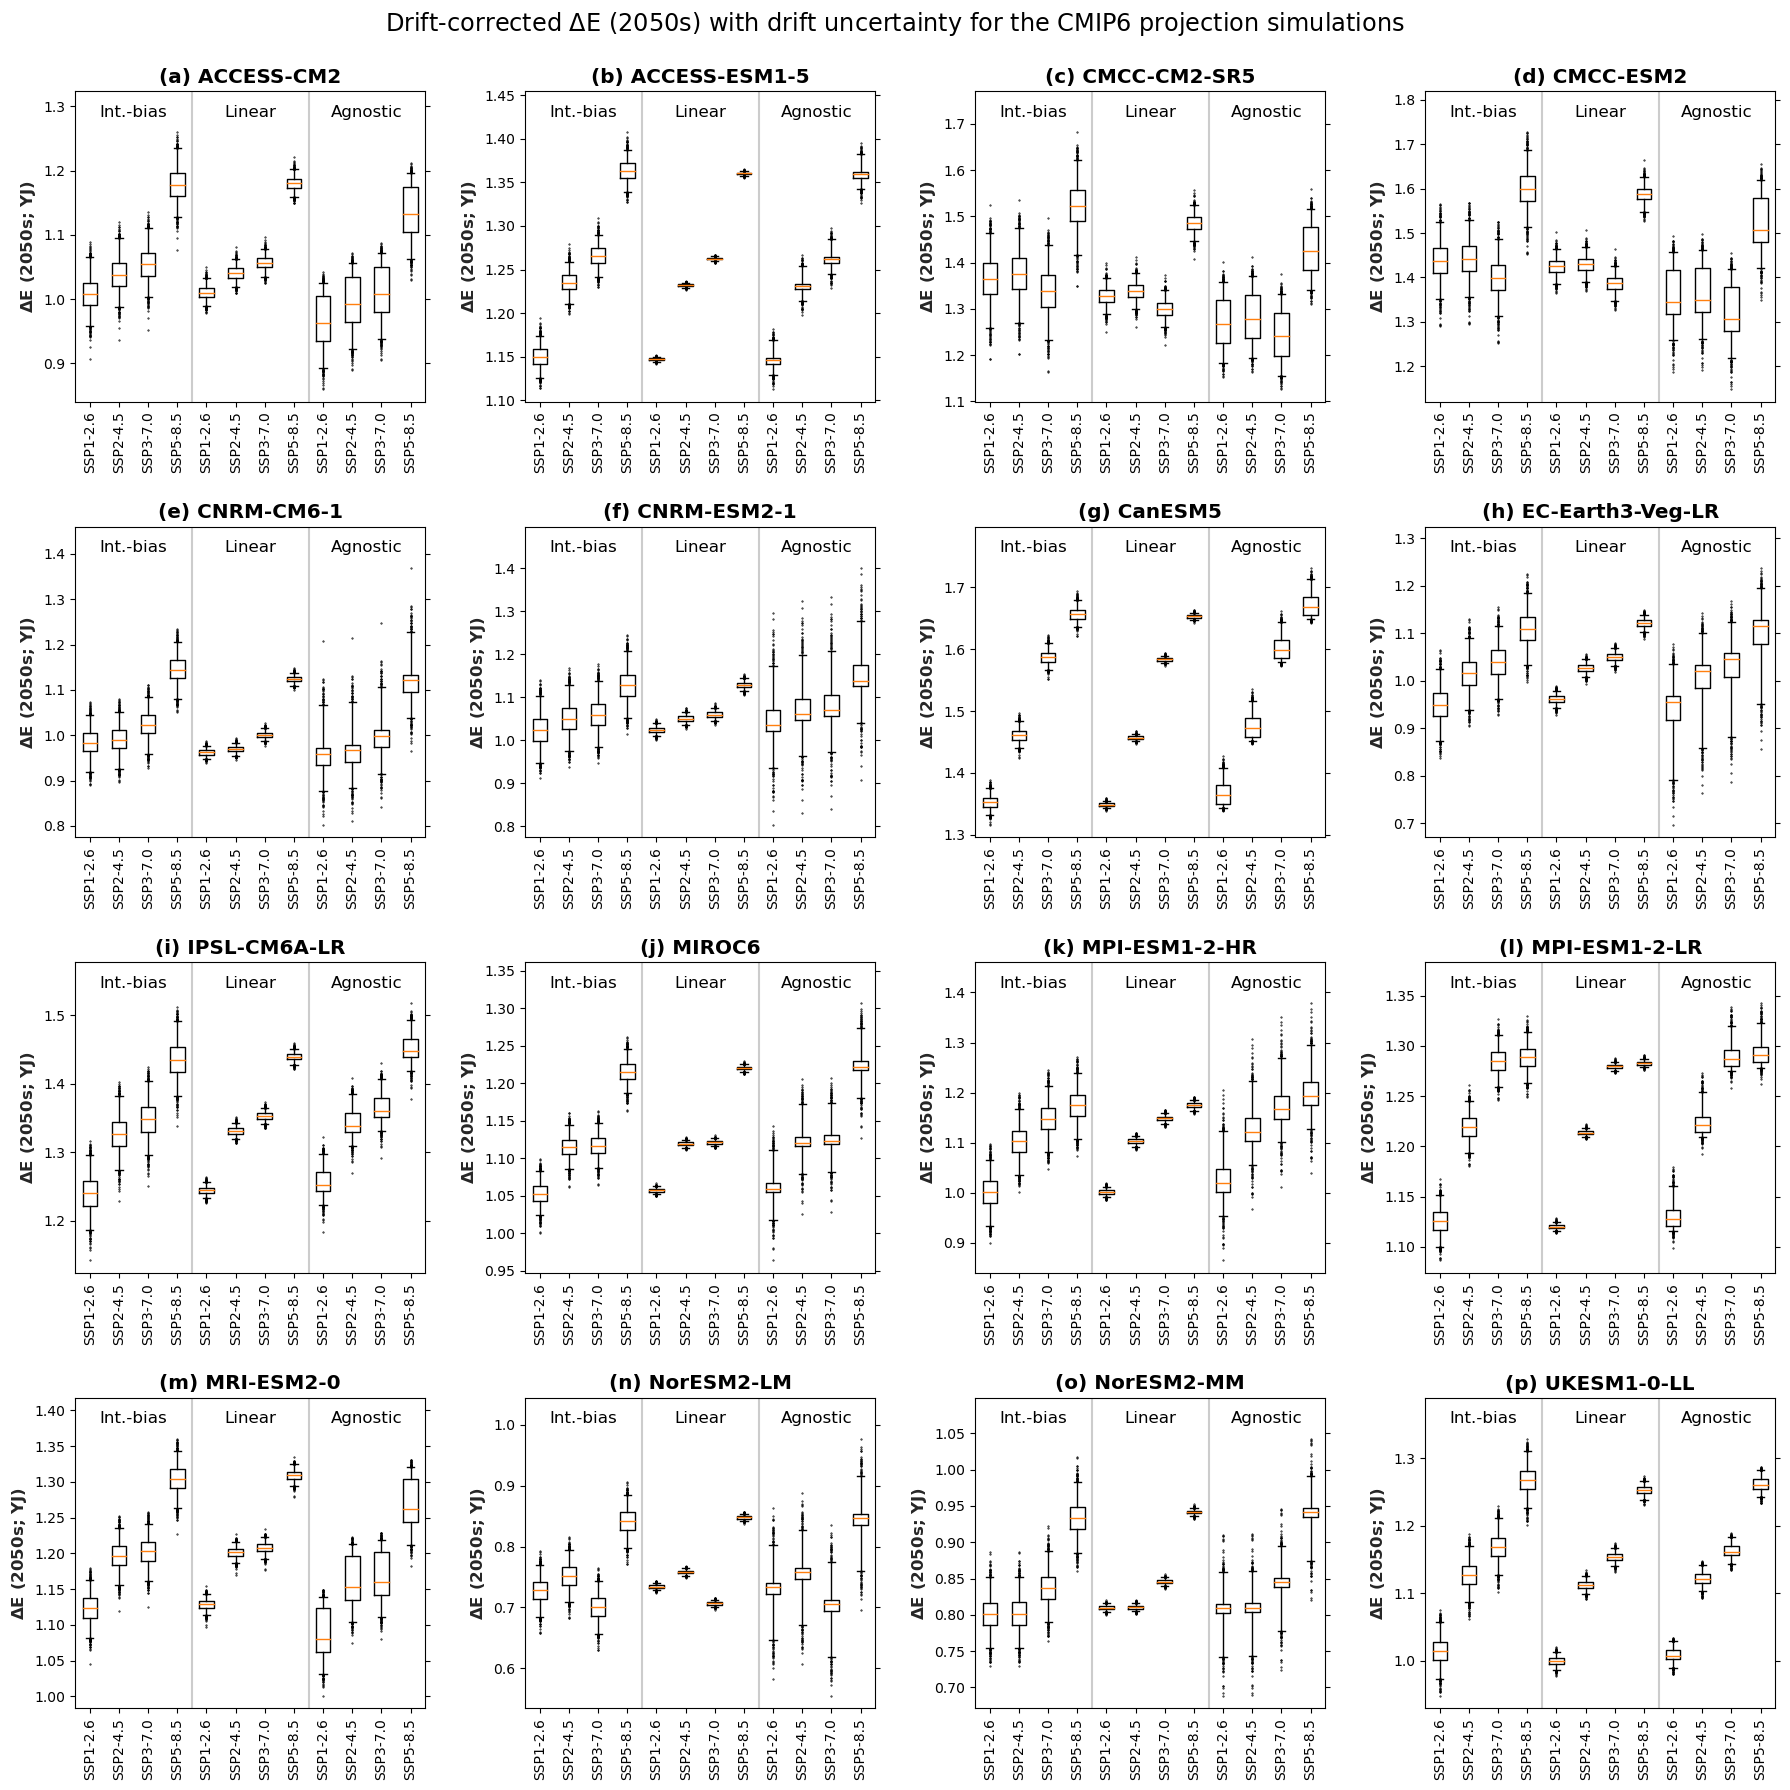

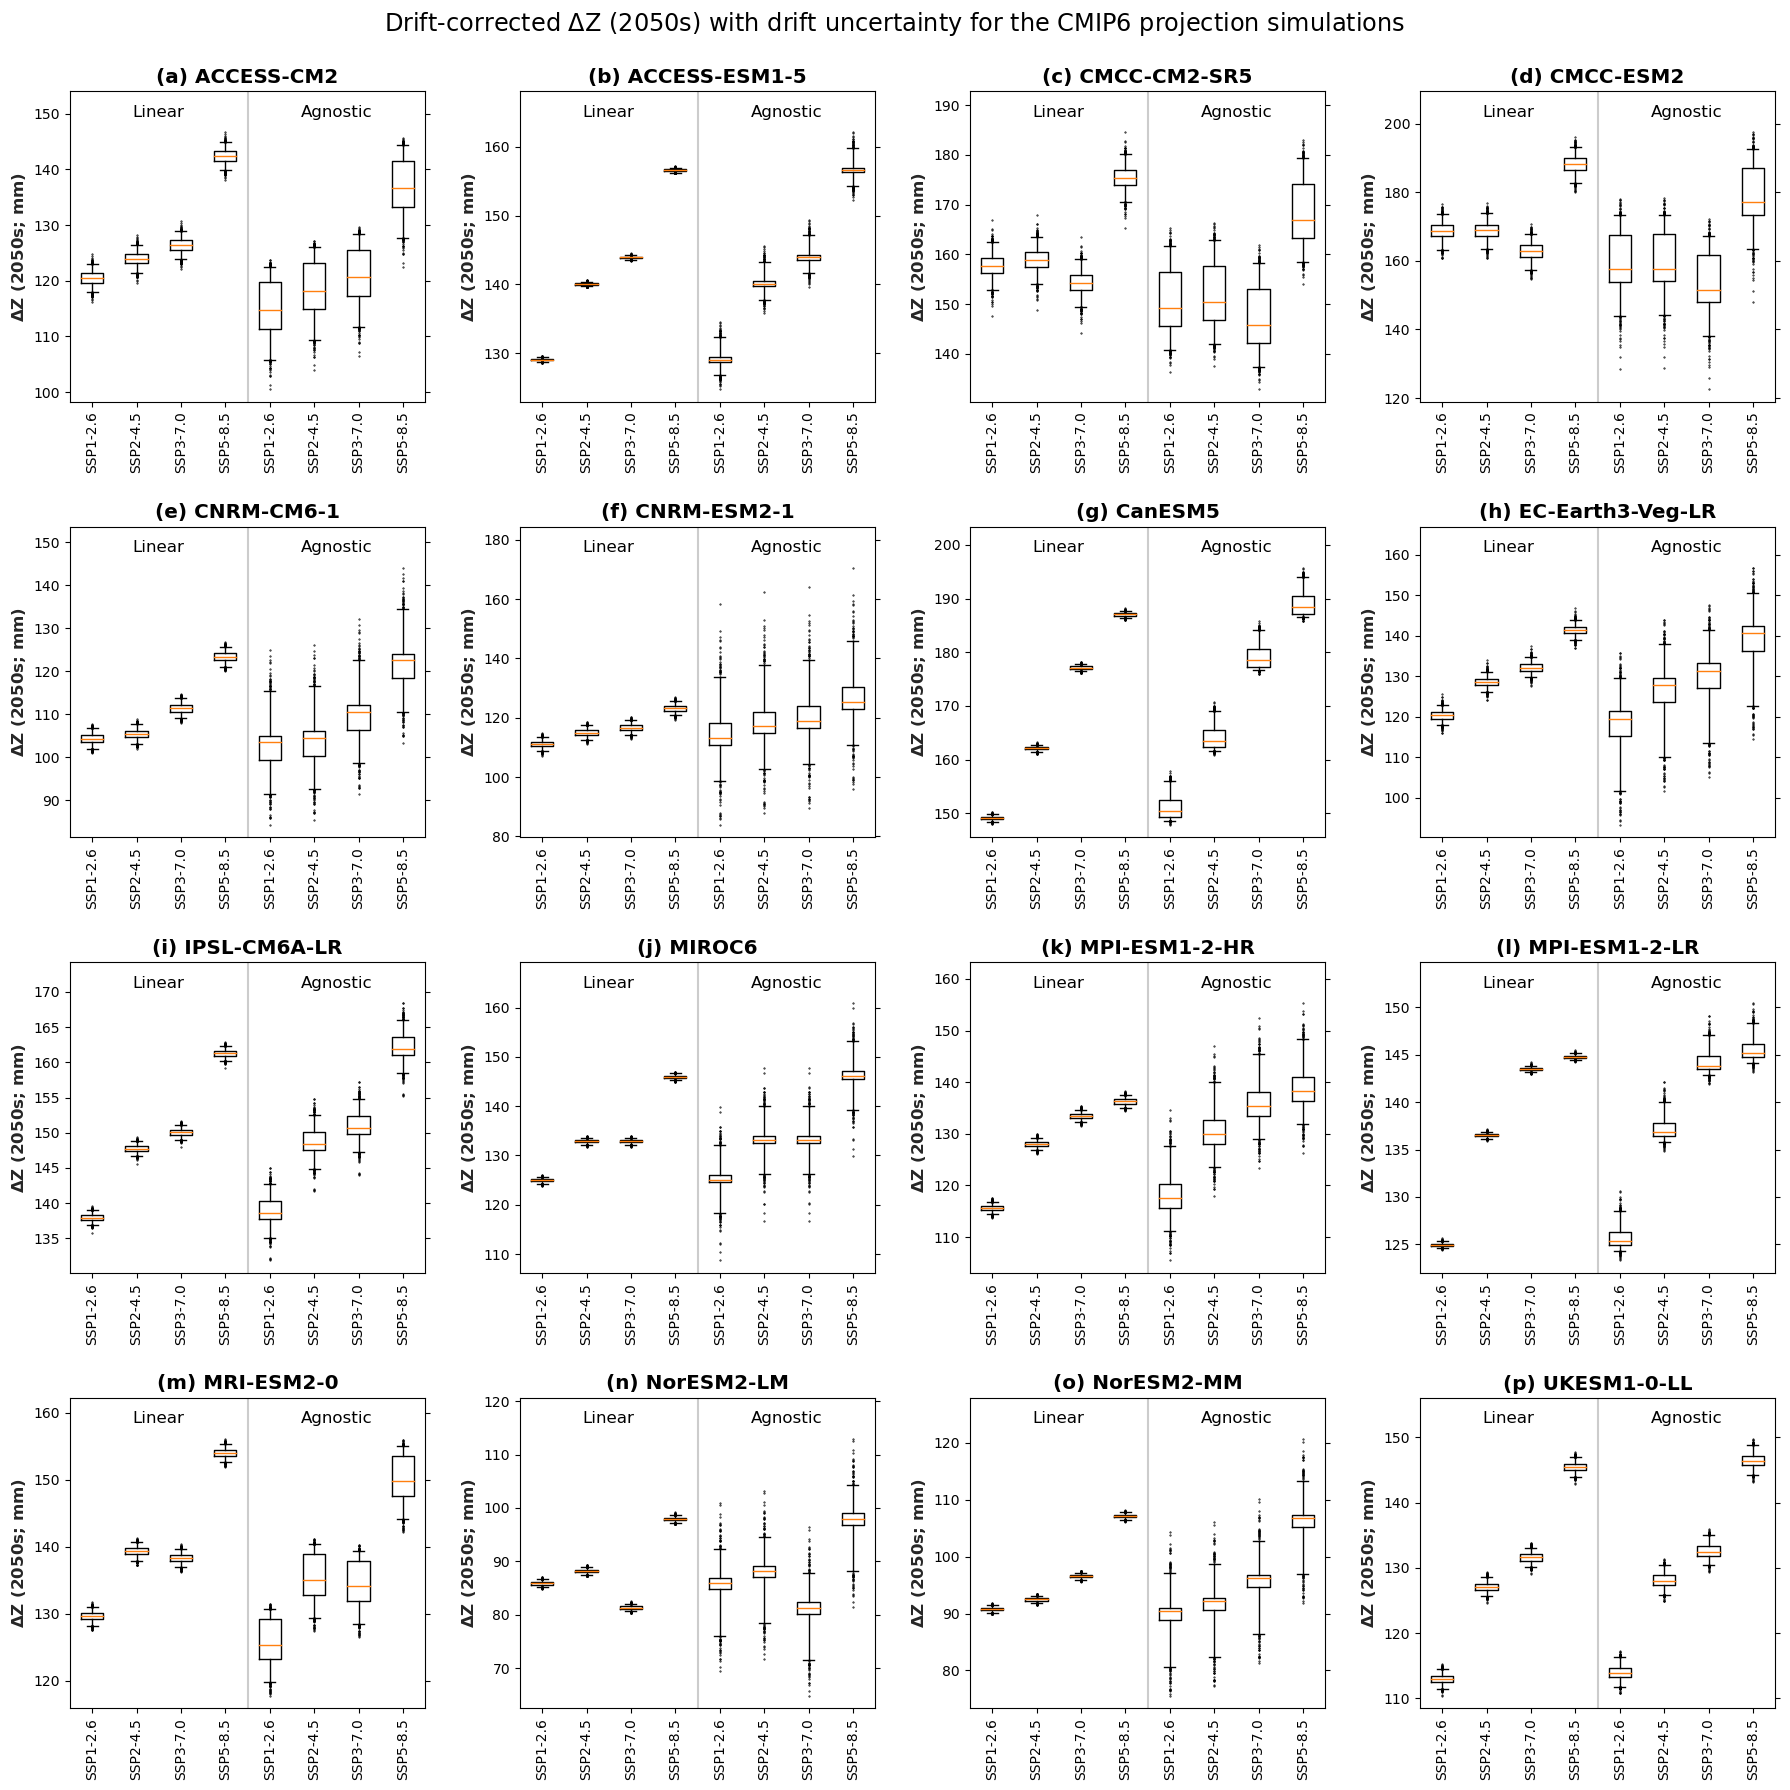

In [8]:
# Ensemble boxplots for E and Z for the 2050s
for variable in ['E', 'Z']:
    # Ensemble boxplots
    fig = d22a.ensemble_boxplots(variable=variable, target_decade='2050s')
    _ = d22a.name_save_fig(fig, fso='f')

In [9]:
# Summary table (across ensemble)
tex_str = d22a.get_summary_tex()  # Latex version
_ = d22a.name_save_table(tex_str, fso='f')  # save Latex version
summary_df = d22a.get_summary_df(target_decade='2050s')  # show DataFrame version
summary_df

Written table_01.tex


$\Delta E$ (2050s; YJ) $\Delta H$ (2050s; YJ)  \
Drift uncertainty Int.-bias       0.10 (0.04–0.21)       0.09 (0.04–0.22)   
                  Linear          0.02 (0.01–0.08)       0.02 (0.01–0.08)   
                  Agnostic        0.12 (0.04–0.24)       0.13 (0.04–0.31)   
Other uncertainty Model           0.72 (0.64–0.90)       0.75 (0.72–0.89)   
                  Scenario        0.17 (0.10–0.30)       0.16 (0.09–0.29)   

                            $\Delta Z$ (2050s; mm)    $\eta$ (unitless)  \
Drift uncertainty Int.-bias                    NaN  0.030 (0.011–0.071)   
                  Linear            2.4 (0.7–10.4)  0.007 (0.002–0.027)   
                  Agnostic         16.2 (4.2–35.2)  0.056 (0.006–0.147)   
Other uncertainty Model           76.2 (74.1–98.0)  0.172 (0.162–0.180)   
                  Scenario        21.1 (12.1–37.9)  0.014 (0.006–0.079)   

                            $\epsilon$ (mm YJ$^{-1}$)  
Drift uncertainty Int.-bias                       NaN  
                  Linear                0.8 (0.2–3.2)  
                  Agnostic             6.7 (0.9–21.3)  
Other uncertainty Model              12.0 (11.5–13.3)  
                  Scenario              7.5 (4.1–9.9)

Written fig05.pdf (14.94 MB)
Written fig05.png (1.20 MB)


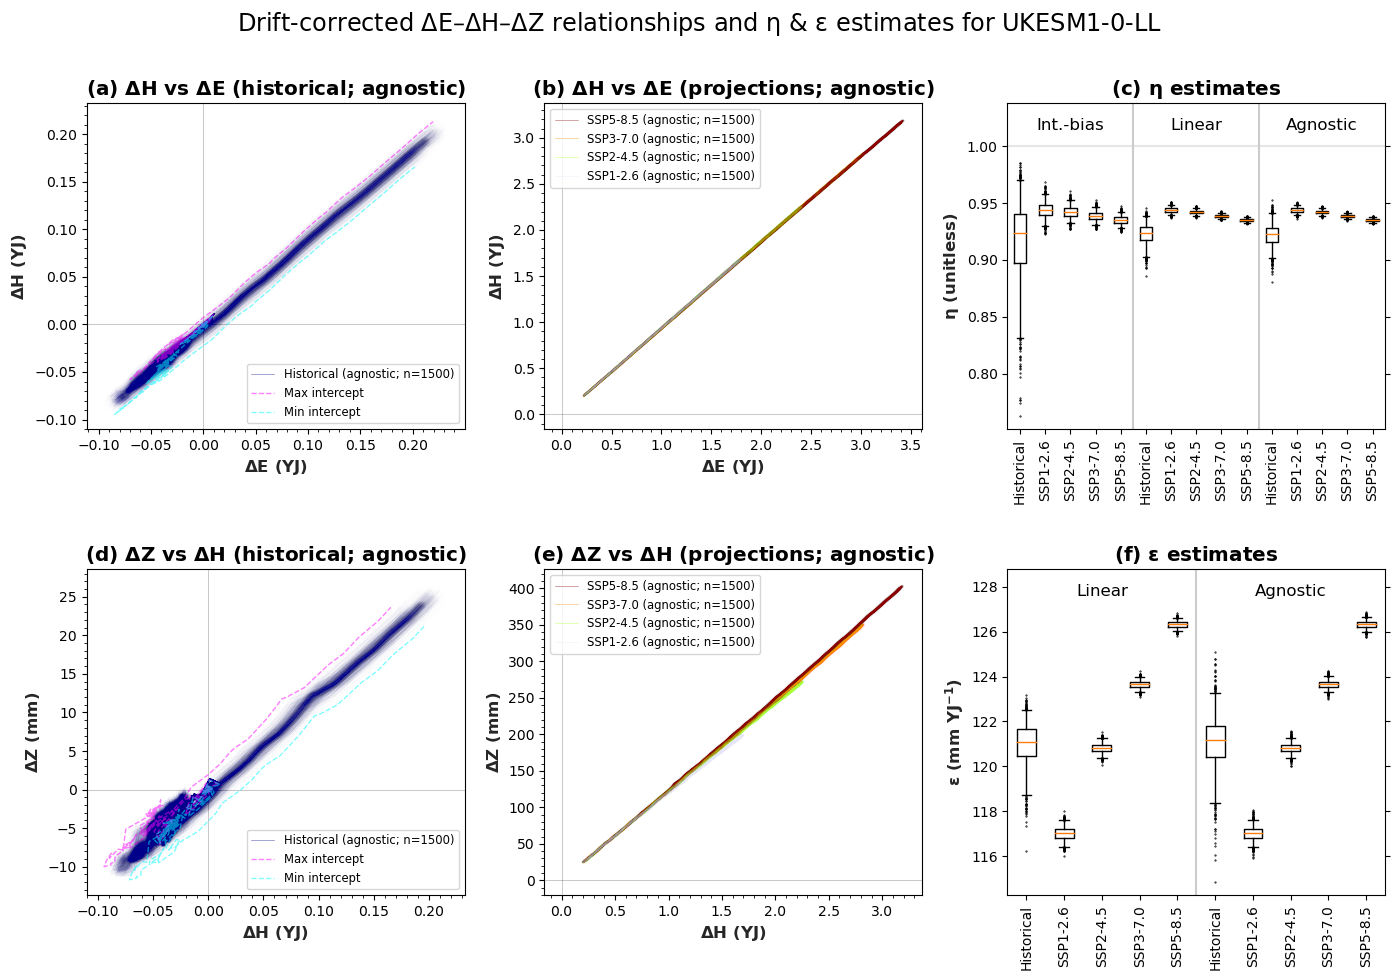

In [10]:
# Relationships, eta, eps
fig = d22a.composite_rel_eta_eps_demo()
_ = d22a.name_save_fig(fig, fso='f')

Written fig06.pdf (0.26 MB)
Written fig06.png (1.03 MB)


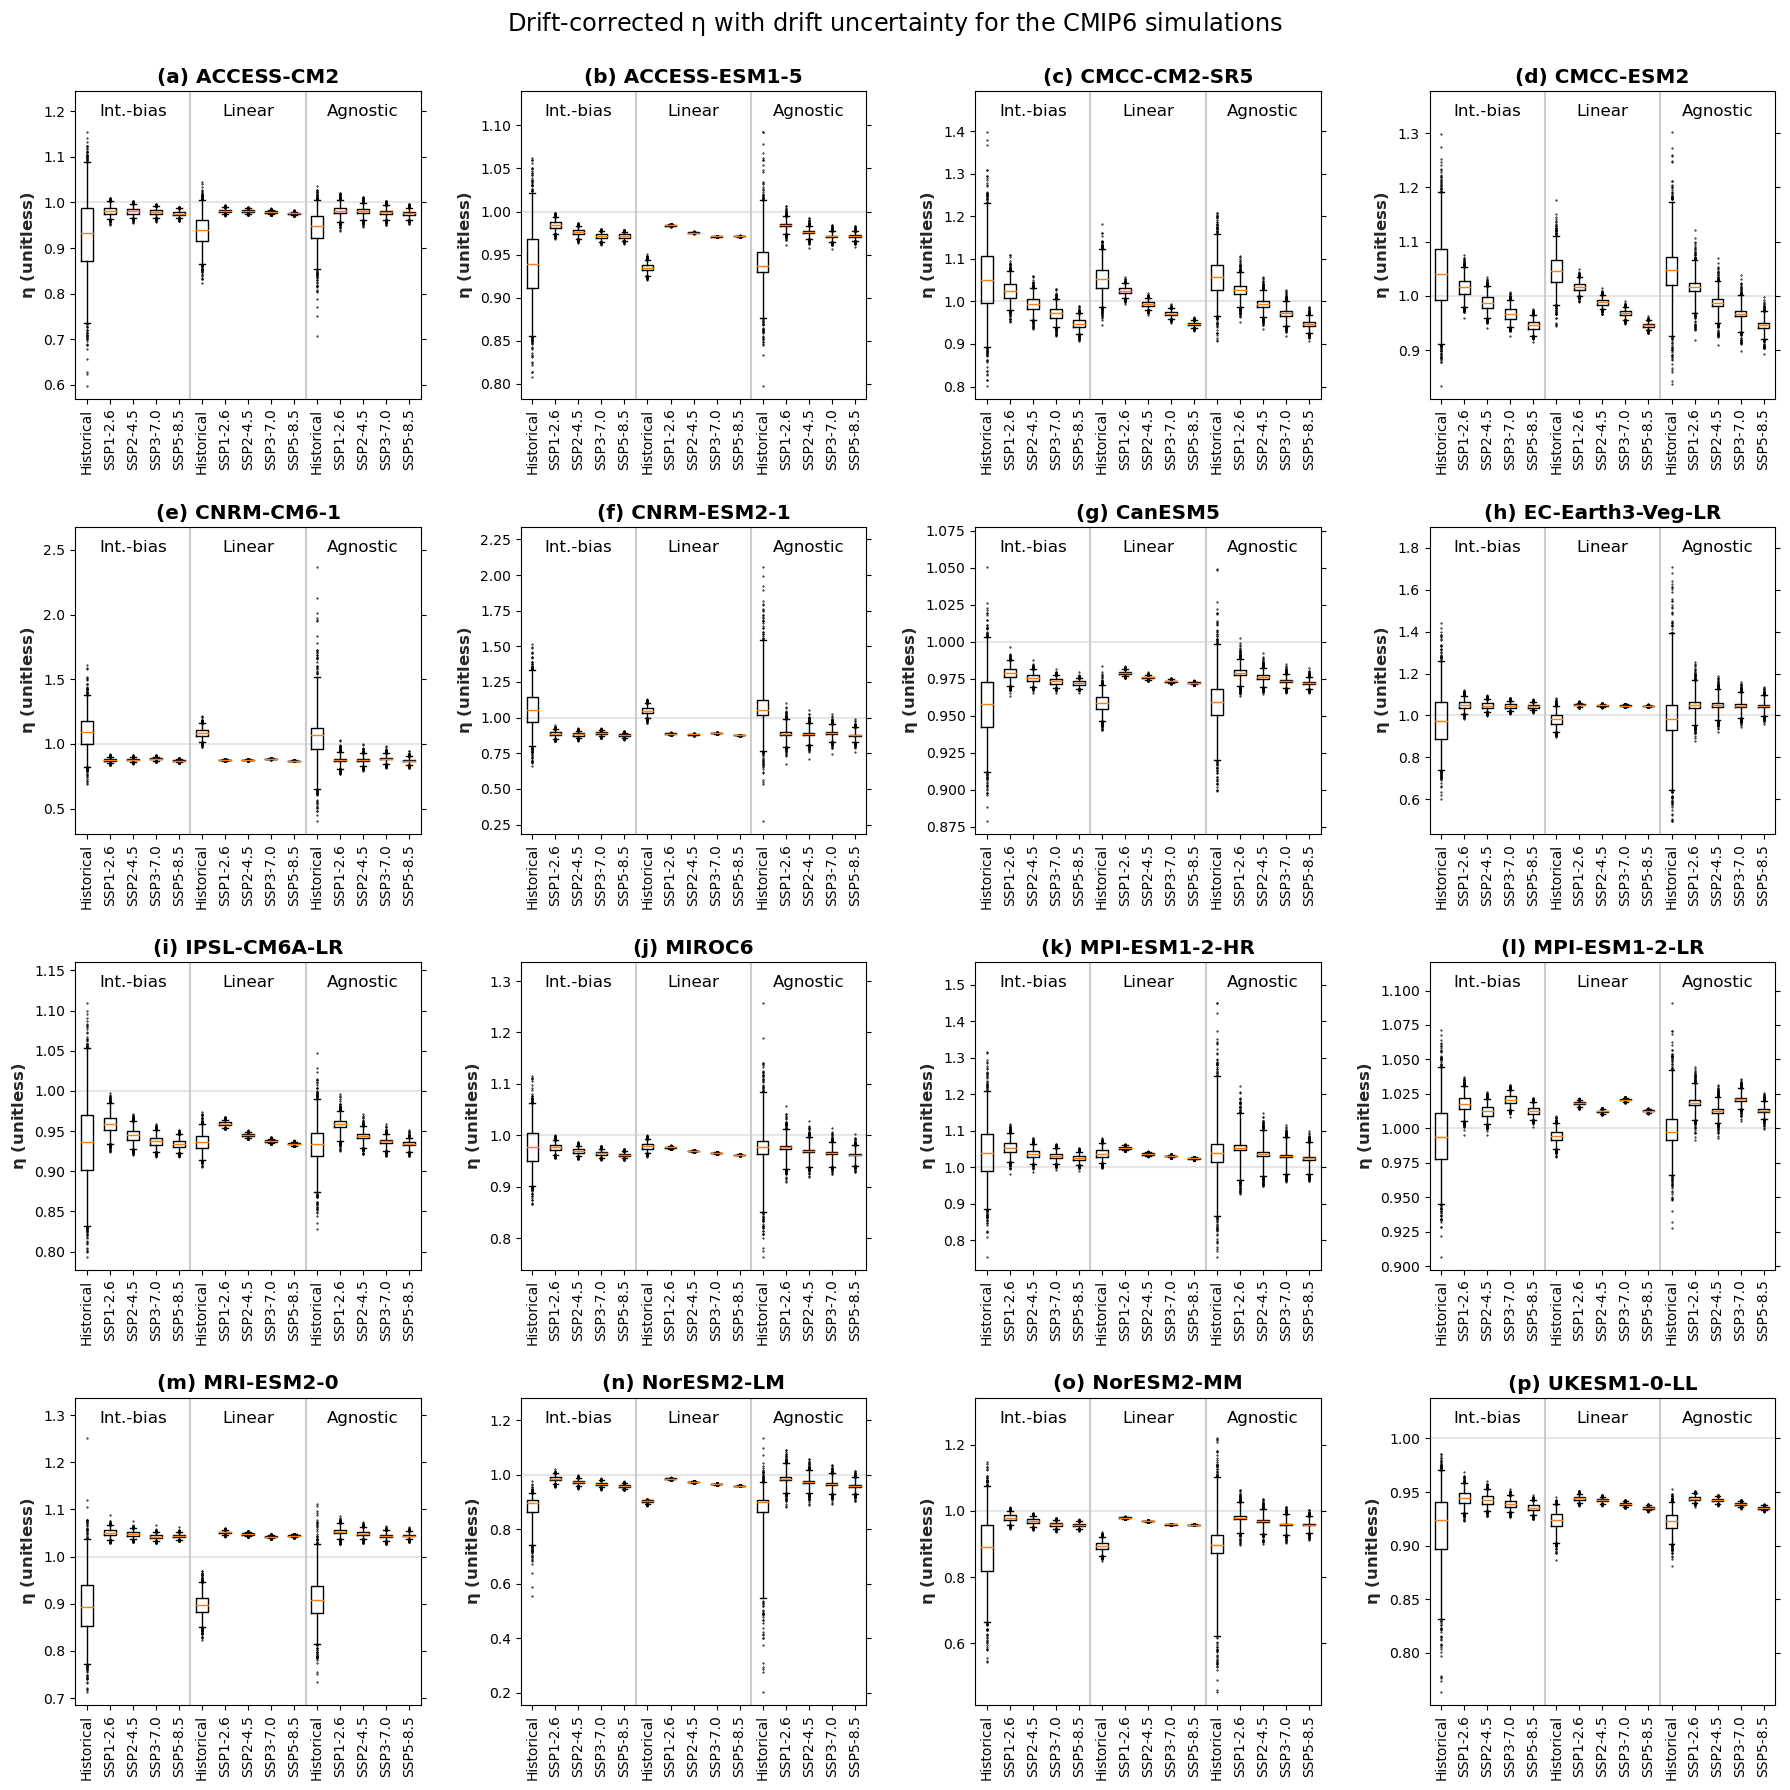

In [11]:
# Ensemble boxplots for eta
fig = d22a.ensemble_boxplots(variable='eta', target_decade=None)
_ = d22a.name_save_fig(fig, fso='f')

## Supplement

In [12]:
# Table containing model information
tex_str = d22a.get_esm_info_tex()
_ = d22a.name_save_table(tex_str, fso='s')  # save
# Show corresponding DataFrame in notebook
info_df = d22a.get_esm_info_df()
info_df

Written table_S01.tex


,Variant,Control length (yr),Calendar,Further information URL
Model,,,,
ACCESS-CM2,r1i1p1f1,500,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARC...
ACCESS-ESM1-5,r1i1p1f1,1000,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACC...
CMCC-CM2-SR5,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CMCC-ESM2,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CNRM-CM6-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CNRM-ESM2-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CanESM5,r1i1p1f1,1000,365 day,https://furtherinfo.es-doc.org/CMIP6.CCCma.Can...
EC-Earth3-Veg-LR,r1i1p1f1,501,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.EC-Earth-...
IPSL-CM6A-LR,r1i1p1f1,1000,gregorian,https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL...


In [13]:
# # Compare methods applied to H & Z
# for variable in ['H', 'Z']:
#     fig = d22a.composite_compare_methods_timeseries(variable=variable)
#     _ = d22a.name_save_fig(fig, fso='s')

Written s01.pdf (0.18 MB)
Written s01.png (1.04 MB)
Written s02.pdf (0.19 MB)
Written s02.png (0.93 MB)


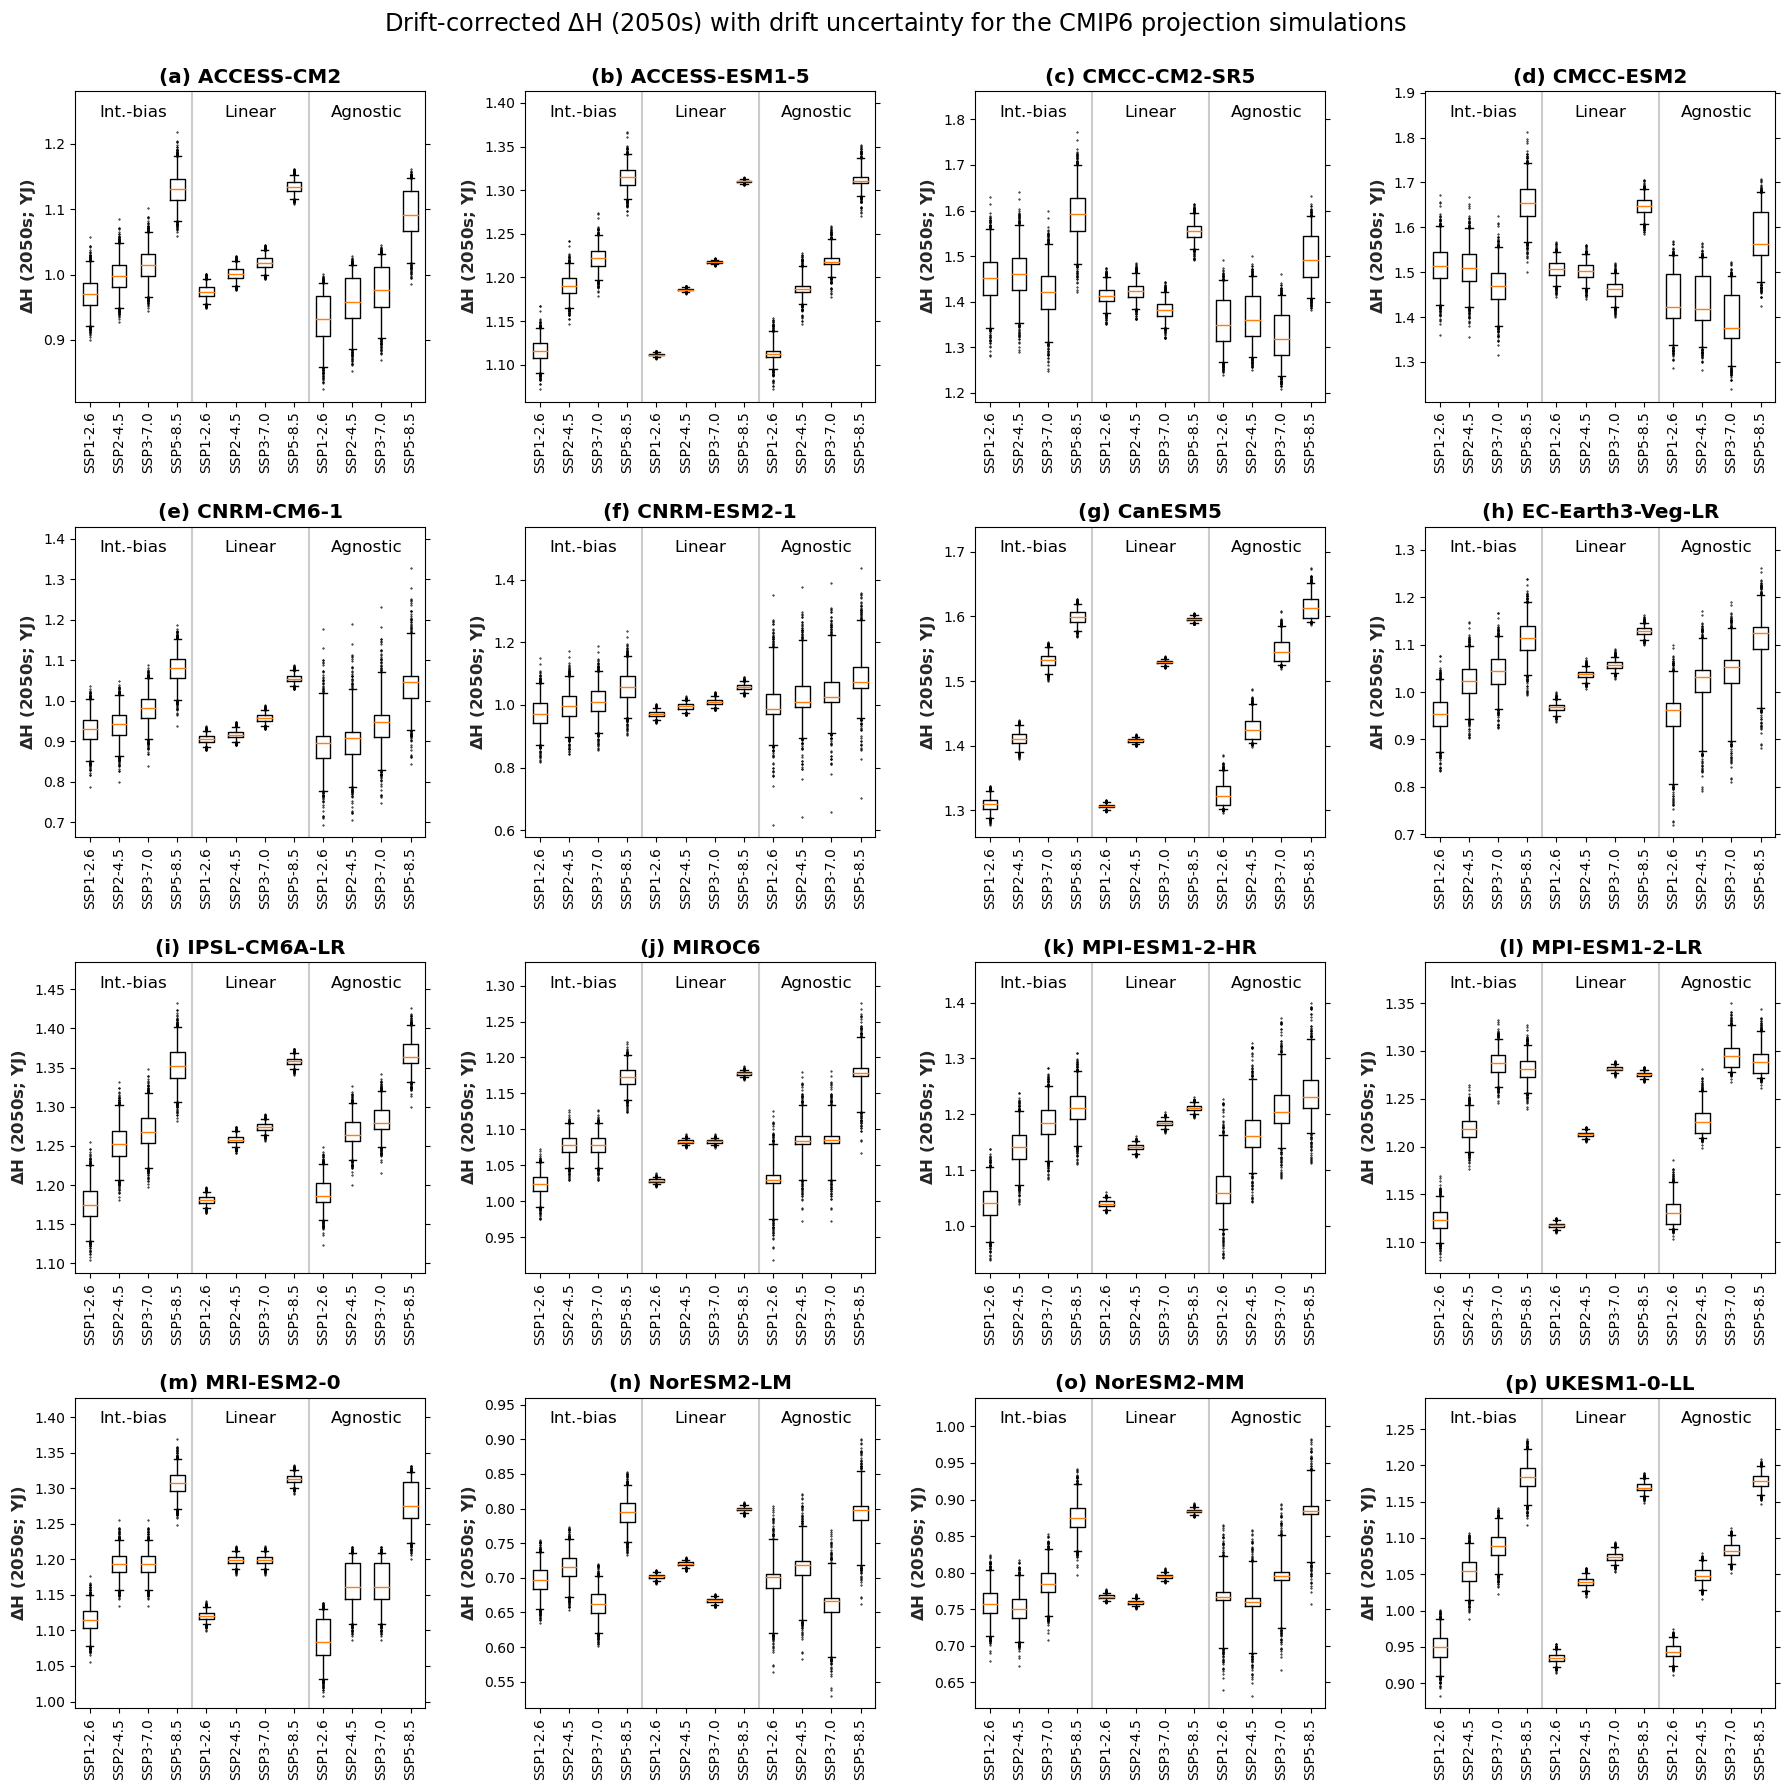

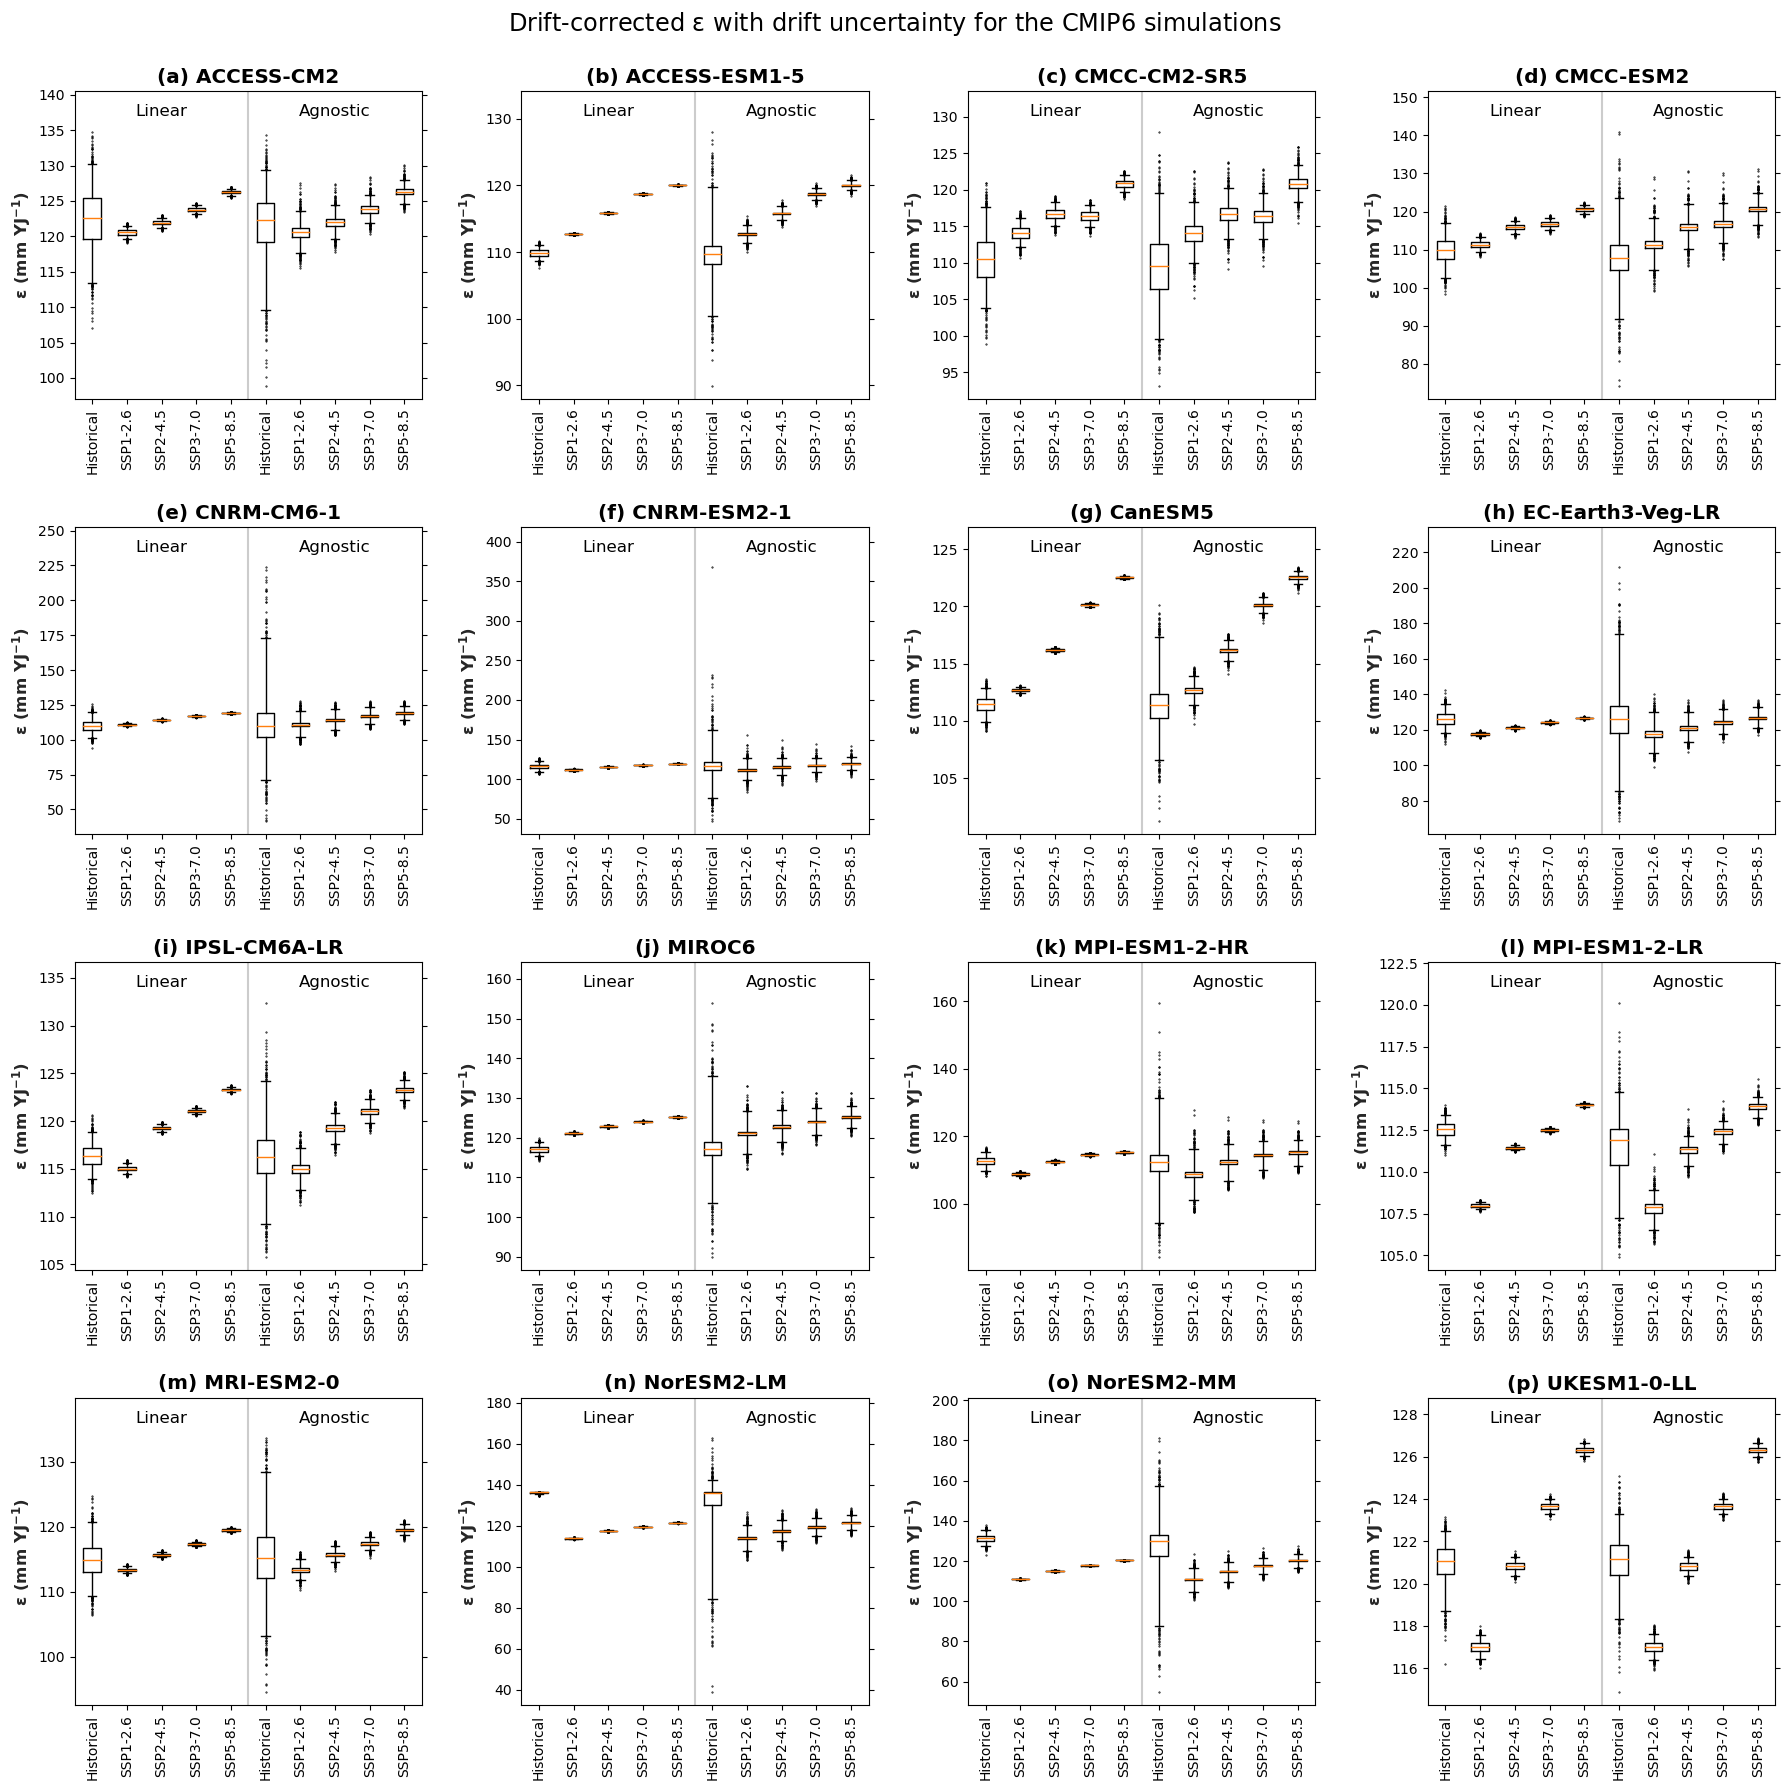

In [14]:
# Ensemble boxplots for H (2050s) and eps
for variable, target_decade in [('H', '2050s'), ('eps', None)]:
    # Ensemble boxplots
    fig = d22a.ensemble_boxplots(variable=variable, target_decade=target_decade)
    _ = d22a.name_save_fig(fig, fso='s')

In [15]:
# Detailed tables for E, H, and Z for 2050s
for variable in ['E', 'H', 'Z']:
    # Latex table
    tex_str = d22a.get_detailed_tex(variable=variable, target_decade='2050s')
    _ = d22a.name_save_table(tex_str, fso='s')
    # Table as DataFrame
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade='2050s')
    print(f'{variable} (2050s)', detailed_df)

Written table_S02.tex
E (2050s)                  Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                    0.11   0.04     0.13               NaN     0.17
ACCESS-ESM1-5                 0.05   0.01     0.04               NaN     0.21
CMCC-CM2-SR5                  0.21   0.08     0.18               NaN     0.18
CMCC-ESM2                     0.17   0.08     0.20               NaN     0.20
CNRM-CM6-1                    0.13   0.03     0.19               NaN     0.16
CNRM-ESM2-1                   0.16   0.03     0.24               NaN     0.10
CanESM5                       0.04   0.01     0.06               NaN     0.30
EC-Earth3-Veg-LR              0.15   0.04     0.24               NaN     0.16
IPSL-CM6A-LR                  0.11   0.02     0.08               NaN     0.20
MIROC6                        0.06   0.01     0.09               NaN     0.16
MPI-ESM1-2-HR                 0.

In [16]:
# Detailed tables for eta and eps
for variable in ['eta', 'eps']:
    # Latex table
    tex_str = d22a.get_detailed_tex(variable=variable, target_decade=None)
    _ = d22a.name_save_table(tex_str, fso='s')
    # Table as DataFrame
    detailed_df = d22a.get_detailed_df(variable=variable, target_decade=None)
    print(f'{variable}', detailed_df)

Written table_S05.tex
eta                  Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                   0.030  0.011    0.036               NaN    0.006
ACCESS-ESM1-5                0.014  0.002    0.015               NaN    0.013
CMCC-CM2-SR5                 0.071  0.027    0.062               NaN    0.079
CMCC-ESM2                    0.056  0.025    0.074               NaN    0.071
CNRM-CM6-1                   0.037  0.009    0.094               NaN    0.015
CNRM-ESM2-1                  0.050  0.010    0.143               NaN    0.015
CanESM5                      0.011  0.003    0.012               NaN    0.007
EC-Earth3-Veg-LR             0.059  0.014    0.147               NaN    0.007
IPSL-CM6A-LR                 0.034  0.007    0.026               NaN    0.024
MIROC6                       0.020  0.003    0.056               NaN    0.014
MPI-ESM1-2-HR                0.053  0.

In [17]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-19 13:09:07
End:       2023-07-19 13:13:17
Wall time: 250 s
